## Assignment

Import necessary library

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [3]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [5]:
df_can['Total'] = df_can.sum(axis=1)

<ipython-input-5-8cd345a76c6e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [6]:
### type your answer here

China_India = df_can.loc[df_can.Country.isin(['China', 'India'])]
China_India 

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

<AxesSubplot:>

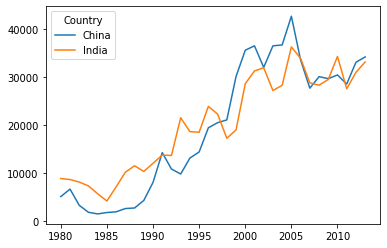

In [7]:
### type your answer here

China_India = China_India.drop(['Continent', 'Region', 'DevName', 'Total'], axis=1).transpose()
China_India.columns = China_India.iloc[0]
China_India = China_India.iloc[1:]
China_India.plot(kind='line')

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [8]:
### type your answer here

top5country = df_can.sort_values('Total', ascending=False).head(5)
top5country



,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


Step 2: Plot graph

<AxesSubplot:>

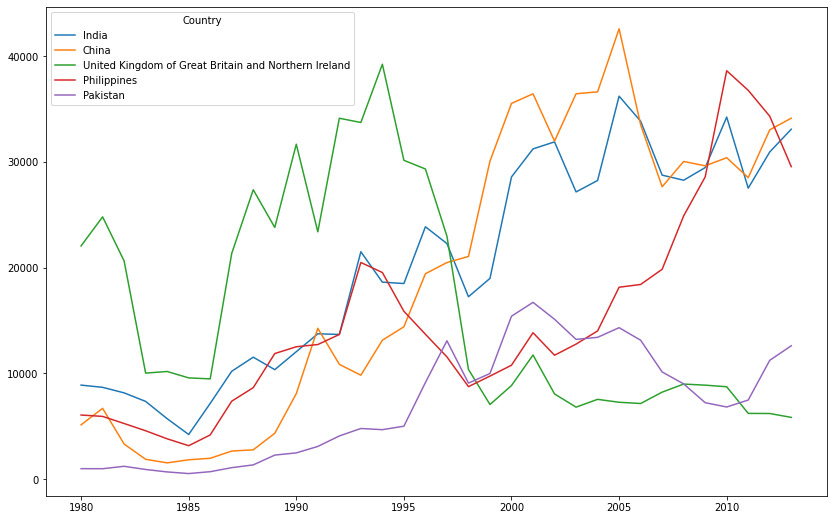

In [9]:
### type your answer here

top5Plot = top5country.drop(['Continent', 'Region', 'DevName', 'Total'], axis=1).transpose()
top5Plot.columns = top5Plot.iloc[0]
top5Plot = top5Plot.iloc[1:]
top5Plot.plot(kind='line', figsize=(14,9))

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

<AxesSubplot:>

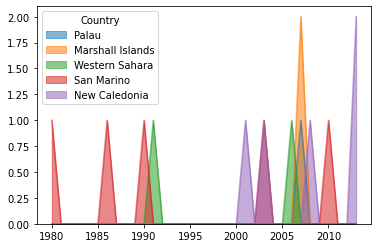

In [10]:
### type your answer here

top5country = df_can.sort_values('Total', ascending=True).head(5)
least = top5country.drop(['Continent', 'Region', 'DevName', 'Total'], axis=1).transpose()
least.columns = least.iloc[0]
least = least.iloc[1:]
least.plot(kind='area', stacked=False, alpha=0.55)



**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [12]:
### type your answer here

distribution = df_can.loc[df_can.Country.isin(['Greece', 'Albania', 'Bulgaria'])]
distribution = distribution.drop(['Continent', 'Region','DevName', 'Total'], axis=1).transpose()
distribution.columns = distribution.iloc[0]
distribution = distribution.iloc[1:]
distribution.plot(kind='hist', bins=15, alpha=0.35)



TypeError: no numeric data to plot

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [ ]:
### type your answer here

top15country = df_can.sort_values('Total', ascending = False).head(15)
top15country = top15country.loc[:, ['Country', 'Total']]
top15country



,Country,Total
79,India,691904
36,China,659962
183,United Kingdom of Great Britain and Northern I...,551500
136,Philippines,511391
130,Pakistan,241600
185,United States of America,241122
81,Iran (Islamic Republic of),175923
162,Sri Lanka,148358
140,Republic of Korea,142581
137,Poland,139241


Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

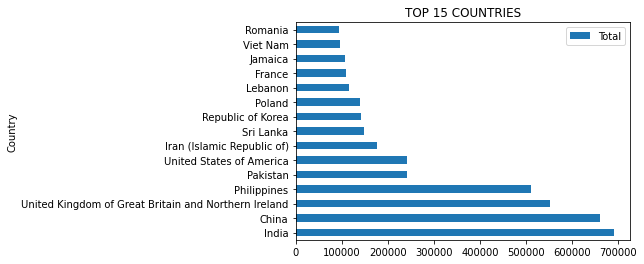

In [ ]:
### type your answer here

top15country.set_index('Country', inplace=True)
top15country.plot(kind='barh', ylabel='Total', title='TOP 15 COUNTRIES')





# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).